# Model stability, some background 

In [1]:
import pandas as pd
from IPython.display import display, HTML, Markdown


from modelclass import model 

In [2]:
%load_ext autoreload
%autoreload 2

## A model:

A model with:

 - $\textbf n$ number of endogeneous variables
 - $\textbf k$ number of exogeneous variables 
 - $\textbf r$ max lag of endogeneous variables 
 - $\textbf s$ max lag of exogeneous variables 
 - $t$ time frame (year, quarter, day second or another another unit)
 
can be written in two ways, normalized or un-normalized form

### normalized form

\begin{eqnarray}
y_t^1 & = & y_t^2...,y_{t}^n...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^k,...x_{t-s}^1...,x_{t-s}^k) \\
y_t^2 & = & y_t^1...,y_{t}^n...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^k,...x_{t-s}^1...,x_{t-s}^k) \\
\vdots \\
y_t^n & = & y_t^1...,y_{t}^{n-1}...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^r,x..._{t-s}^1...,x_{t-s}^k)
\end{eqnarray}



Written in matrix notation where  $\textbf{y}_t$ and $\textbf{x}_t$ are vectors of endogenous/exogenous  variables for time t

\begin{eqnarray}  
\textbf{y}_t & = & \textbf{F}( \textbf{y}_t \cdots \textbf{y}_{t-r},\textbf{x}_t \cdots \textbf{x}_{t-s})
\end{eqnarray}

The functions are normalized, meaning: 

- Each endogenous variable is on the left hand side one time - and only one time.
- An endogenous variable without lags can **not** be on the right hand side in an equation, which has the variable on the left hand side. 

## The derivatives
We can express the matrices of derivatives with respect to the endogenous and exogenous variables like this: 


\begin{eqnarray*}
A & = & \frac{\partial F}{\partial y_t^T} \\ \\
E_i & = & \frac{\partial F}{\partial y_{t-i}^T } \hspace{5 mm} i=1, \cdots , r\\  \\
F_j & = & \frac{\partial F}{\partial x_{t-j} ^T} \hspace{5 mm} j=0, \cdots , s\\  \\
\end{eqnarray*}



## the companion matrix
To calculate the effect of small perturbations around a solution the derivative matrices can be used.

For simplicity a system with $r$ (max lag of endogenous variables) of 2 and $s$ (max lag of exogenous variables)  of 1 we have the linearized model:

$\Delta \textbf{y}_t = \textbf{A}\Delta  \textbf{y}_{t} + \Delta E_1 \textbf{y}_{t-1} + \Delta E_2 \textbf{y}_{t-2} +  E_3 \Delta  \textbf{y}_{t-3} + F_0 \Delta x_t + F_1 \Delta x_{t-1}$


Rearranging the equation to isolate $\Delta \textbf{y}_{t}$ on the left side:

$
(\textbf{A} - \textbf{I}) \Delta \textbf{y}_{t} = E_1 \Delta \textbf{y}_{t-1} + \Delta E_2 \textbf{y}_{t-2} + \Delta E_3 \textbf{y}_{t-3} + F_0 \Delta x_t + F_1 \Delta x_{t-1}
$

$
\Delta \textbf{y}_{t} = (\textbf{A} - \textbf{I})^{-1} E_1 \Delta \textbf{y}_{t-1} + (\textbf{A} - \textbf{I})^{-1} \Delta E_2 \textbf{y}_{t-2} + (\textbf{A} - \textbf{I})^{-1} \Delta E_3 \textbf{y}_{t-3} + (\textbf{A} - \textbf{I})^{-1} F_0 \Delta x_t +  (\textbf{A} - \textbf{I})^{-1} F_1 \Delta x_{t-1}
$

This is a 3th order system of difference equations. In order to be able to find the gain stability of the system it has to be rewritten as 1st order system of difference equations. That is a system with only one lag. Fortunately there is 
a standard way to do this. It runs as follow: 


Using the state vector:
$
\textbf{z}_t = \begin{bmatrix} \textbf{y}_t \\ \textbf{y}_{t-1} \\ \textbf{y}_{t-2} \end{bmatrix}$ and $\textbf{w}_t = \begin{bmatrix} \textbf{x}_t \\ \textbf{x}_{t-1} \\ 0 \end{bmatrix}
$


The system can be expressed as:

$
\Delta \textbf{z}_{t} = \underbrace{\begin{bmatrix} (\textbf{A}-\textbf{I})^{-1}E_1 & (\textbf{A}-\textbf{I})^{-1}E_2 & (\textbf{A}-\textbf{I})^{-1}E_3 \\ \textbf{I} & \textbf{0} & \textbf{0} \\ \textbf{0} & \textbf{I} & \textbf{0} \end{bmatrix}}_{\textbf{C}} \Delta \textbf{z}_{t-1} +
\left[\begin{matrix}\left(\mathbb{I} - A\right)^{-1} F_{0} & \left(\mathbb{I} - A\right)^{-1} F_{1} & 0 \\{0} & {0}  & {0}\\{0} & {0} & {0} \\\end{matrix}\right]
\Delta \textbf{w}_t$

This system is a first order system - and the stability can be evaluated using the matrix:

$
\textbf{C} = \begin{bmatrix} (\textbf{A}-\textbf{I})^{-1}E_1 & (\textbf{A}-\textbf{I})^{-1}E_2 & (\textbf{A}-\textbf{I})^{-1}E_3 \\ \textbf{I} & \textbf{0} & \textbf{0} \\ \textbf{0} & \textbf{I} & \textbf{0} \end{bmatrix}
$


is also known as **the companion matrix** 

## Stability and the eignvalues of the companion matrix

The dynamic behavior can be 
evaluated by looking at the eigenvalues $\textbf{e}_{t}$ of the companion matrix $((I-\bar A)^{-1}\bar E )$. Note that $\textbf{e}_{t}$ can are complex numbers.

 - If all $\lvert \textbf{e}_{t} \lvert < 1$ the system will converge. 
 - If at least one of the eigenvalues is larger than one, the system will amplify. 
 -  If at least one $\textbf{e}_{t}$ has an imaginary part the system will oscillate 
    - dampened if all $\lvert \textbf{e}_{t} \lvert < 1$ or 
    - amplifying  if one $\lvert \textbf{e}_{t} \lvert > 1$.

The eigenvalues and associated eigenvectors can be found by the function mdif.get_eigen which will be used below.

## Calculating Eigenvalues and eigenvectors using modelflow 
Modelflow has a can calculate the derivative matrices $A, E_i$ and $F_j$ and create the companion matrix and the associate eigenvalues and eigenvectors. 

Below a function is 

In [3]:
def calculate_eigen(mul,acc,years=100,show=False,dropvar=None,latexprint=False):
    '''Function which creates a Samuelson Multiplier accelerator model, runs it
    and alculates the eigenvalues for the compaignion matrix in order to 
    evaluate stability. 
    
    A polar plot of the compex eigenvalues and graphs of the endogenous variables can 
    be displayes '''
    
    fam   = f'''\
    frml <>  y = c+i $ 
    frml <I> c = {mul} * y(-1) $
    frml <>  i = {acc} * ((c-c(-1))+ 0.3 * (c(-2)-c(-1))  )$'''

    mma = model(fam,modelname = 'Accelerator multiplicator model')
    
    # Generate data
    df = pd.DataFrame([[1000,200]]*years,index=range(2018,2018+years),columns=['Y','IM'])
    
    # Generate lagged variables for c
    baseline  = df.mfcalc(f'c = {mul} * y(-1)') 
    
    # Solve the model 
    _  = mma(baseline,2021,2050,silent=True)     # Solve the model 
    
    # Retrieve a dictionary with a dataframe with eigenvalues and eigenvectors for each year 
    eig_dict = mma.get_df_eigen_dict(dropvar=dropvar)
    
    # In this example we only want the values for one year. The model is linear and time independent 
    eig21 = eig_dict[2021]
    
    # Define a function which calculates a list of absolute values when served a dataframe column of complex numbers
    compabs = lambda complex: [abs(value) for index,value in complex.items()]
    
    # now only retain the columns where the length of the eigenvalues are above 0.0001 
    eig21out = (eig21.   
                T.        # Trtanspose as we query and eval on columns 
                eval('absolute_value=@compabs(Eigenvalues)'). # calculate the absolute value of the eigenvalue 
                query('absolute_value>=0.0001').              # Select the rows where the abs value is above 0+.0001
                drop('absolute_value',axis=1).                # We dont need the absolute value anymore, so the column is dropped. 
                T)   # Trtanspose again. 
    
    display(Markdown(f'**Model where multiplier = {mul} and accelerator = {acc}**'))
    display(eig21.iloc[[0],:])
    if show: 
        print(mma.equations)

        display(Markdown(f'**Compagnion matrix**'))

        display(model.compstyle( mma.stability_newton.get_df_comp_dict()[2021])) 


        display(eig21.style.set_caption('<b>Original eigenvalues and -vectors'))
        display(model.compstyle(eig21out).set_caption('<b>Non zero eigenvalues and -vectors'))
        display(mma.stability_newton.eigenvector_plot(size=(4,4),per=2023));       # show the eigenvalues 
        display (mma[['Y','C','I']].plot())  # Show the solution

        if latexprint: 
            jacobi= mma.stability_newton.A_dic[2021]
            for l,j in jacobi.items(): 
                name = 'A = ' if l=='lag=0' else f'E_{l.split("-")[1]} = '
                print(name)
                print(j.to_latex())
    return mma.stability_newton

In [4]:
xx = calculate_eigen(mul=0.5,acc=0.1,years=30,show=0);

* Take care. Lags or leads in the equations, mfcalc run for 2019 to 2047


**Model where multiplier = 0.5 and accelerator = 0.1**

,0,1,2,3,4,5
Eigenvalues,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.479684+0.000000j,0.035158+0.173305j,0.035158-0.173305j


* Take care. Lags or leads in the equations, mfcalc run for 2019 to 2047


**Model where multiplier = 0.8 and accelerator = 2**

,0,1,2,3,4,5
Eigenvalues,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.354101+0.000000j,1.022949+0.555985j,1.022949-0.555985j


    frml <>  y = c+i $ 
    frml <I> c = 0.8 * y(-1) $
    frml <>  i = 2 * ((c-c(-1))+ 0.3 * (c(-2)-c(-1))  )$


**Compagnion matrix**

,C(-1),I(-1),Y(-1),C(-2),I(-2),Y(-2)
C(-1),,,0.80,,,
I(-1),-2.60,,1.60,0.60,,
Y(-1),-2.60,,2.40,0.60,,
C(-2),1.00,,,,,
I(-2),,1.00,,,,
Y(-2),,,1.00,,,


,0,1,2,3,4,5
Eigenvalues,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.354101+0.000000j,1.022949+0.555985j,1.022949-0.555985j
C(-1),0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.271944+0.000000j,0.347505-0.188873j,0.347505+0.188873j
I(-1),0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,-0.151574+0.000000j,0.228108+0.188873j,0.228108-0.188873j
Y(-1),0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.120370+0.000000j,0.575613+0.000000j,0.575613-0.000000j
C(-2),0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.767984+0.000000j,0.184774-0.285063j,0.184774+0.285063j
I(-2),1.000000+0.000000j,-1.000000+0.000000j,0.000000+0.000000j,-0.428054+0.000000j,0.249607+0.048971j,0.249607-0.048971j
Y(-2),0.000000+0.000000j,0.000000+0.000000j,1.000000+0.000000j,0.339930+0.000000j,0.434381-0.236091j,0.434381+0.236091j


,3,4,5
Eigenvalues,0.35,1.16 ~ 1.02+0.56j,1.16 ~ 1.02-0.56j
C(-1),0.27,0.40 ~ 0.35-0.19j,0.40 ~ 0.35+0.19j
I(-1),-0.15,0.30 ~ 0.23+0.19j,0.30 ~ 0.23-0.19j
Y(-1),0.12,0.58,0.58
C(-2),0.77,0.34 ~ 0.18-0.29j,0.34 ~ 0.18+0.29j
I(-2),-0.43,0.25 ~ 0.25+0.05j,0.25 ~ 0.25-0.05j
Y(-2),0.34,0.49 ~ 0.43-0.24j,0.49 ~ 0.43+0.24j


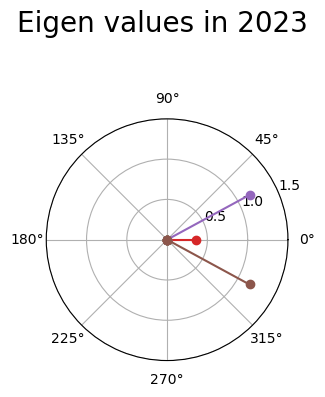

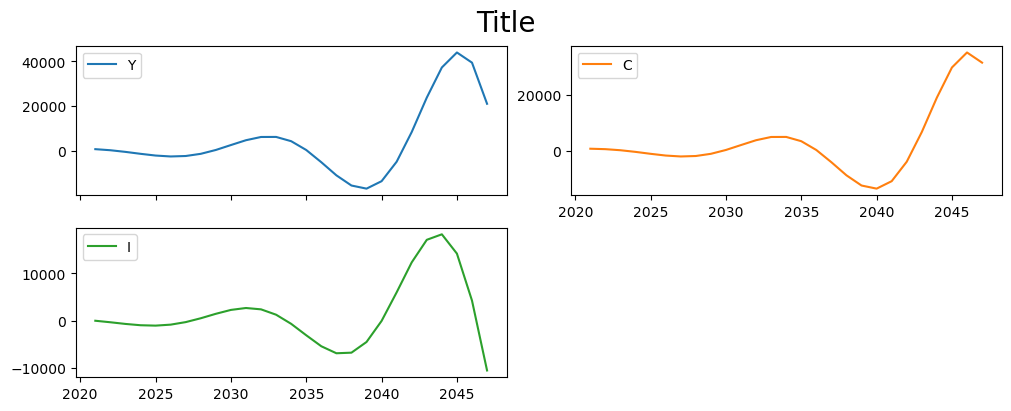

In [5]:
newton = calculate_eigen(mul=0.8,acc=2,years=30,show=1,dropvar=None);

* Take care. Lags or leads in the equations, mfcalc run for 2019 to 2047


**Model where multiplier = 0.49 and accelerator = 2**

,0,1,2,3,4,5
Eigenvalues,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.326403+0.000000j,0.571798+0.757478j,0.571798-0.757478j


    frml <>  y = c+i $ 
    frml <I> c = 0.49 * y(-1) $
    frml <>  i = 2 * ((c-c(-1))+ 0.3 * (c(-2)-c(-1))  )$


**Compagnion matrix**

,C(-1),I(-1),Y(-1),C(-2),I(-2),Y(-2)
C(-1),,,0.49,,,
I(-1),-2.60,,0.98,0.60,,
Y(-1),-2.60,,1.47,0.60,,
C(-2),1.00,,,,,
I(-2),,1.00,,,,
Y(-2),,,1.00,,,


,0,1,2,3,4,5
Eigenvalues,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.326403+0.000000j,0.571798+0.757478j,0.571798-0.757478j
C(-1),0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.248816+0.000000j,0.257102-0.000000j,0.257102+0.000000j
I(-1),0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,-0.083072+0.000000j,0.042919+0.397447j,0.042919-0.397447j
Y(-1),0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.165744+0.000000j,0.300022+0.397447j,0.300022-0.397447j
C(-2),0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.762296+0.000000j,0.163213-0.216214j,0.163213+0.216214j
I(-2),1.000000+0.000000j,-1.000000+0.000000j,0.000000+0.000000j,-0.254509+0.000000j,0.361485+0.216214j,0.361485-0.216214j
Y(-2),0.000000+0.000000j,0.000000+0.000000j,1.000000+0.000000j,0.507788+0.000000j,0.524698+0.000000j,0.524698-0.000000j


,3,4,5
Eigenvalues,0.33,0.95 ~ 0.57+0.76j,0.95 ~ 0.57-0.76j
C(-1),0.25,0.26 ~ 0.26-0.00j,0.26 ~ 0.26+0.00j
I(-1),-0.08,0.40 ~ 0.04+0.40j,0.40 ~ 0.04-0.40j
Y(-1),0.17,0.50 ~ 0.30+0.40j,0.50 ~ 0.30-0.40j
C(-2),0.76,0.27 ~ 0.16-0.22j,0.27 ~ 0.16+0.22j
I(-2),-0.25,0.42 ~ 0.36+0.22j,0.42 ~ 0.36-0.22j
Y(-2),0.51,0.52,0.52


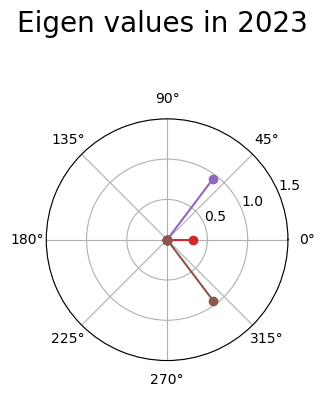

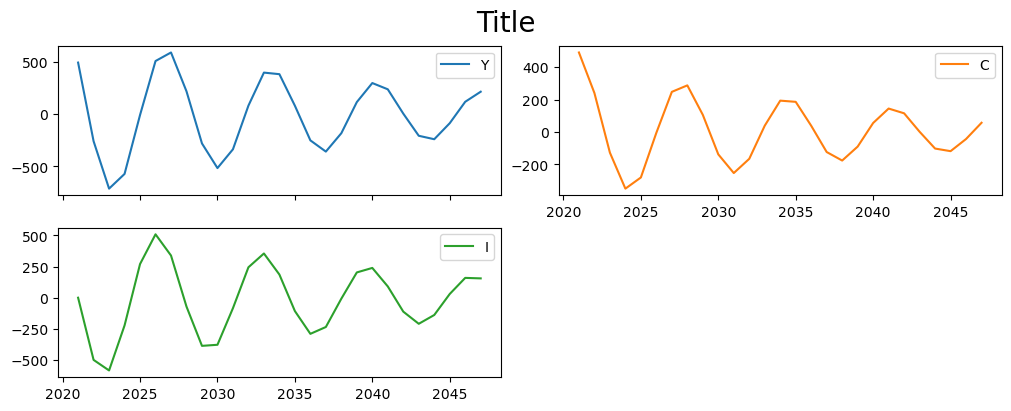

In [6]:
calculate_eigen(mul=0.490,acc=2,years=30,show=1);

* Take care. Lags or leads in the equations, mfcalc run for 2019 to 2047


**Model where multiplier = 0.6 and accelerator = 2**

,0,1,2,3,4,5
Eigenvalues,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.337628+0.000000j,0.731186+0.729129j,0.731186-0.729129j


    frml <>  y = c+i $ 
    frml <I> c = 0.6 * y(-1) $
    frml <>  i = 2 * ((c-c(-1))+ 0.3 * (c(-2)-c(-1))  )$


**Compagnion matrix**

,C(-1),I(-1),Y(-1),C(-2),I(-2),Y(-2)
C(-1),,,0.60,,,
I(-1),-2.60,,1.20,0.60,,
Y(-1),-2.60,,1.80,0.60,,
C(-2),1.00,,,,,
I(-2),,1.00,,,,
Y(-2),,,1.00,,,


,0,1,2,3,4,5
Eigenvalues,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.337628+0.000000j,0.731186+0.729129j,0.731186-0.729129j
C(-1),0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.260505+0.000000j,0.217166-0.216555j,0.217166+0.216555j
I(-1),0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,-0.113915+0.000000j,0.310643+0.216555j,0.310643-0.216555j
Y(-1),0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.146590+0.000000j,0.527809+0.000000j,0.527809-0.000000j
C(-2),0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.771574+0.000000j,0.000837-0.297004j,0.000837+0.297004j
I(-2),1.000000+0.000000j,-1.000000+0.000000j,0.000000+0.000000j,-0.337399+0.000000j,0.361107-0.063921j,0.361107+0.063921j
Y(-2),0.000000+0.000000j,0.000000+0.000000j,1.000000+0.000000j,0.434175+0.000000j,0.361943-0.360925j,0.361943+0.360925j


,3,4,5
Eigenvalues,0.34,1.03 ~ 0.73+0.73j,1.03 ~ 0.73-0.73j
C(-1),0.26,0.31 ~ 0.22-0.22j,0.31 ~ 0.22+0.22j
I(-1),-0.11,0.38 ~ 0.31+0.22j,0.38 ~ 0.31-0.22j
Y(-1),0.15,0.53,0.53
C(-2),0.77,0.30 ~ 0.00-0.30j,0.30 ~ 0.00+0.30j
I(-2),-0.34,0.37 ~ 0.36-0.06j,0.37 ~ 0.36+0.06j
Y(-2),0.43,0.51 ~ 0.36-0.36j,0.51 ~ 0.36+0.36j


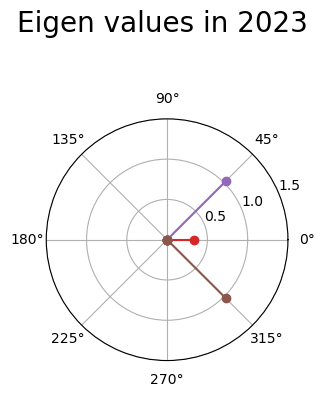

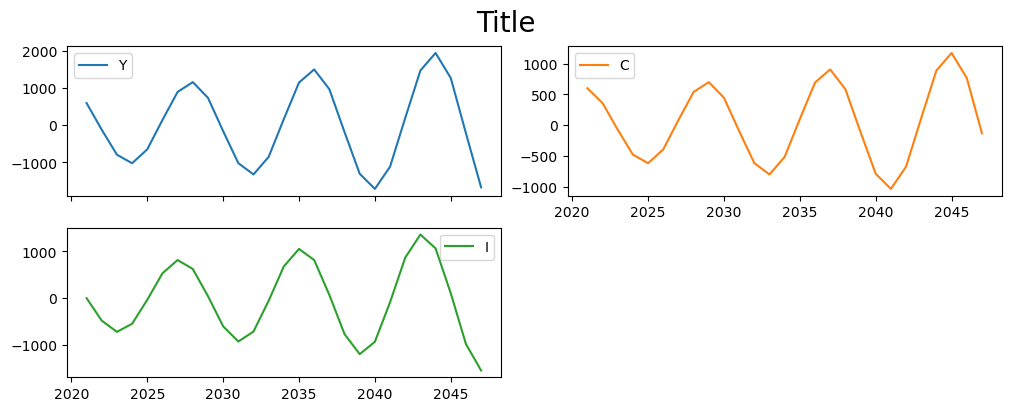

In [7]:
newton = calculate_eigen(mul=0.6,acc=2,years=30,show=1)

In [8]:
newton.get_eigen_jackknife

0 C
1 I
2 Y


{'ALL': {2021: array([0.        +0.j        , 0.        +0.j        ,
         0.        +0.j        , 0.33762801+0.j        ,
         0.731186  +0.72912914j, 0.731186  -0.72912914j]),
  2022: array([0.        +0.j        , 0.        +0.j        ,
         0.        +0.j        , 0.33762801+0.j        ,
         0.731186  +0.72912914j, 0.731186  -0.72912914j]),
  2023: array([0.        +0.j        , 0.        +0.j        ,
         0.        +0.j        , 0.33762801+0.j        ,
         0.731186  +0.72912914j, 0.731186  -0.72912914j]),
  2024: array([0.        +0.j        , 0.        +0.j        ,
         0.        +0.j        , 0.33762801+0.j        ,
         0.731186  +0.72912914j, 0.731186  -0.72912914j]),
  2025: array([0.        +0.j        , 0.        +0.j        ,
         0.        +0.j        , 0.33762801+0.j        ,
         0.731186  +0.72912914j, 0.731186  -0.72912914j]),
  2026: array([0.        +0.j        , 0.        +0.j        ,
         0.        +0.j        , 0.

In [9]:
#newton.get_eigen_jackknife_abs_select()